# Regression Assignment

### 1: What is Simple Linear Regression?

**Simple Linear Regression** is a statistical technique that shows how one variable changes in response to another. It helps predict the value of a dependent variable based on the value of a single independent variable by fitting a straight line that best represents their relationship.


### 2: What are the key assumptions of Simple Linear Regression?

The key assumptions of **Simple Linear Regression** are:

1. **Linearity:** The relationship between the independent and dependent variables is linear.
2. **Independence:** The observations are independent of each other.
3. **Homoscedasticity:** The variance of the errors (residuals) is constant across all levels of the independent variable.
4. **Normality:** The residuals (errors) are normally distributed.
5. **No Autocorrelation:** The residuals are not correlated with each other (especially important in time series data).


### 3: What is heteroscedasticity, and why is it important to address in regression models?

**Heteroscedasticity** occurs when the variability of the residuals (errors) is not constant across all levels of the independent variable — meaning the spread of errors increases or decreases with the value of X.

It’s important to address because heteroscedasticity:

* Violates a key regression assumption of constant error variance.
* Makes coefficient estimates **less reliable**.
* Leads to **biased standard errors**, which can cause incorrect conclusions in hypothesis testing (like wrong p-values or confidence intervals).


### 4: What is Multiple Linear Regression?

**Multiple Linear Regression** is a statistical method used to study and predict the relationship between one dependent variable and **two or more independent variables**.

It helps understand how multiple factors together influence the outcome variable and allows for more accurate predictions compared to simple linear regression.


### 5: What is polynomial regression, and how does it differ from linear regression?

**Polynomial Regression** is a type of regression that models the relationship between the independent and dependent variables as an **nth-degree polynomial** instead of a straight line.

It differs from **Linear Regression** because:

* **Linear Regression** fits a straight line to the data (shows a linear relationship).
* **Polynomial Regression** fits a **curved line**, allowing it to capture **nonlinear relationships** between variables.


### 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.

Intercept: 0.17999999999999794
Slope: 1.9800000000000004


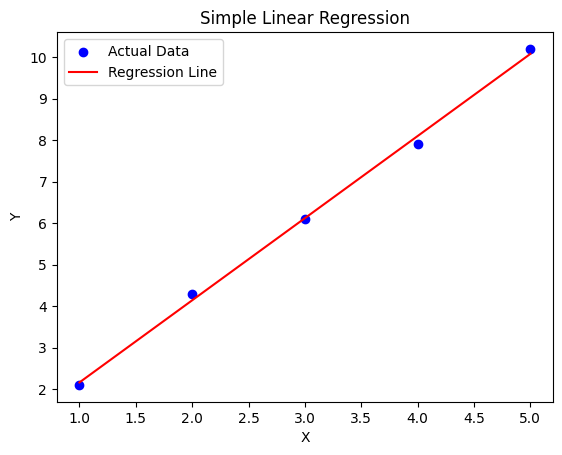

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Print coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# Plot data points and regression line
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


### 7: Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

# Define independent and dependent variables
X = df[['Area', 'Rooms']]
y = df['Price']

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Display coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", list(zip(X.columns, model.coef_)))

# Check for multicollinearity using VIF
X_with_const = sm.add_constant(X)  # Add constant for statsmodels
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Intercept: 103157.89473684214
Coefficients: [('Area', 63.15789473684211), ('Rooms', 34736.842105263146)]

Variance Inflation Factor (VIF):
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


### 8: Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5] 3

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.

Intercept: 0.06000000000002004
Coefficients: [0.   1.94 0.2 ]


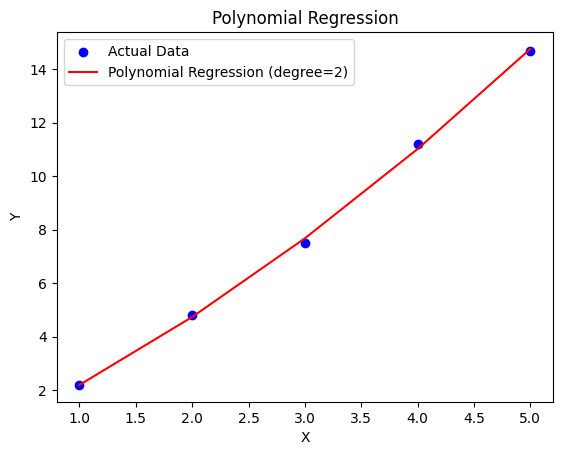

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform features to include polynomial terms (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict values
Y_pred = model.predict(X_poly)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Plot original data and polynomial curve
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Polynomial Regression (degree=2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


## 9: Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.

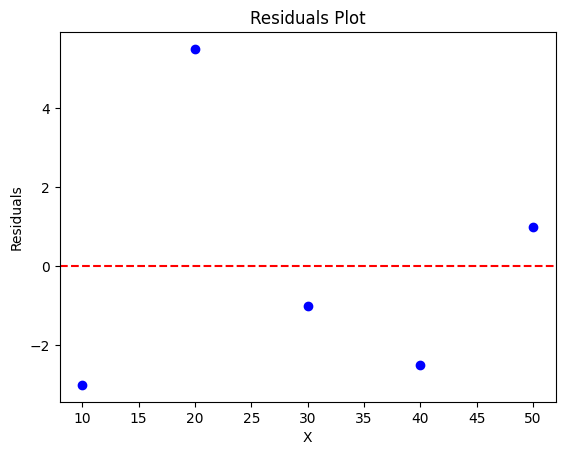

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


### 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

##### To address heteroscedasticity:

Transform the dependent variable – Apply a log, square root, or Box–Cox transformation to stabilize variance.

Example: use log(Price) instead of Price.

Use Weighted Least Squares (WLS) – Assign smaller weights to observations with higher variance.

Use robust standard errors – Apply heteroscedasticity-consistent errors (like HC0–HC3) to make hypothesis tests valid.

Check model specification – Ensure no important predictors are missing and the functional form is correct.

##### To address multicollinearity:

Check correlations and VIF values – Identify which features are highly correlated.

Remove or combine correlated variables – For example, if Area and Rooms are correlated, keep only one or use Area per Room.

Use Regularization Techniques – Apply Ridge or Lasso Regression to reduce the effect of multicollinearity.

Feature Engineering / Dimensionality Reduction – Use Principal Component Analysis (PCA) to create uncorrelated components.